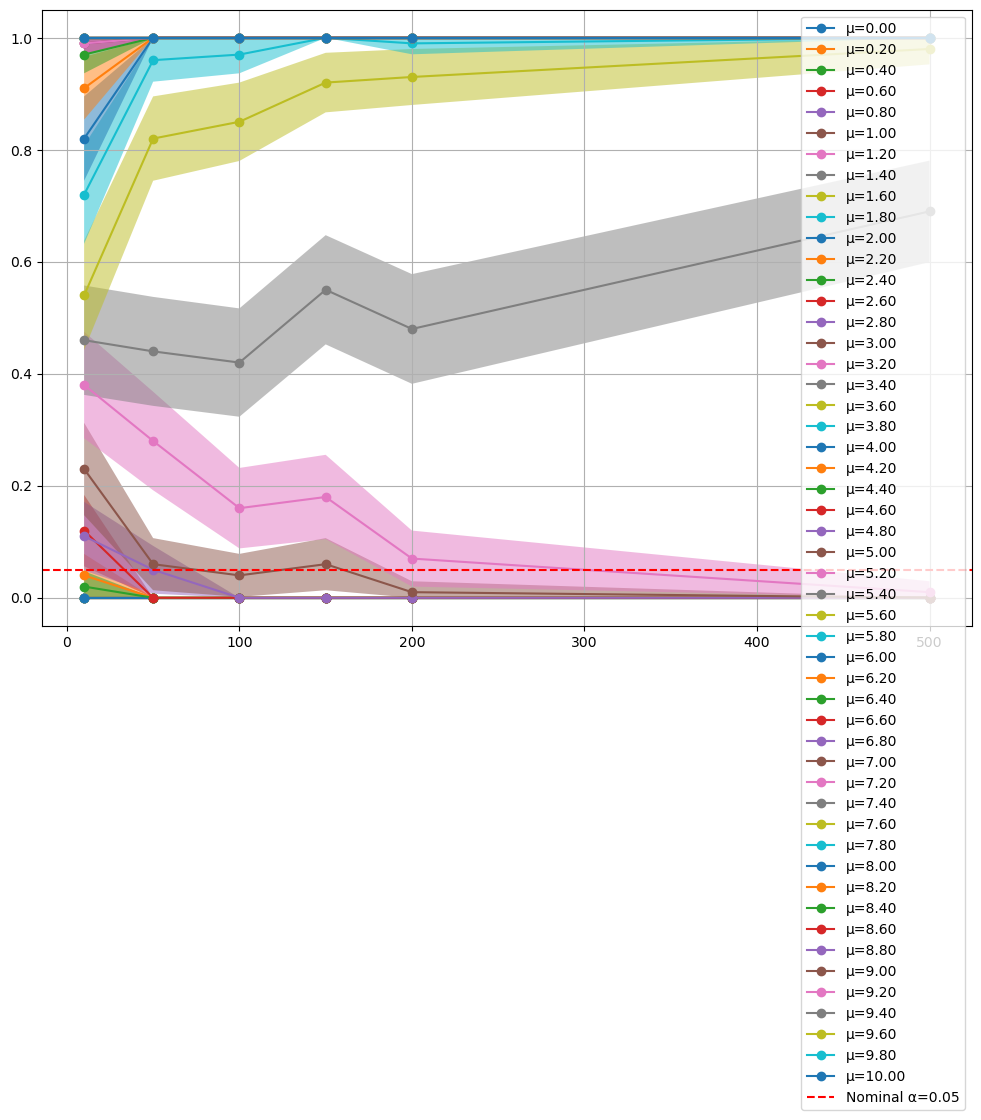

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t
from statsmodels.stats.proportion import proportion_confint

N = 10**2  # Количество симуляций
sample_sizes = [10, 50, 100, 150, 200, 500]  # Размеры выборок
alpha = 0.05  # Уровень значимости
true_means = np.linspace(0, 10, 51)  # Истинные средние

# Генерация выборок из различных распределений
def generate_samples(distribution, n, true_mean=0):
    if distribution == "normal":
        return np.random.normal(loc=true_mean, scale=1, size=n)
    elif distribution == "uniform":
        return np.random.uniform(low=-np.sqrt(3), high=np.sqrt(3), size=n) + true_mean
    elif distribution == "exponential":
        return np.random.exponential(scale=1, size=n) - 1 + true_mean

# Вычисление доверительных интервалов для пропорции
def compute_interval(sample, alpha=0.05):
    mean = np.mean(sample)
    s = np.sqrt(np.sum((sample - mean)**2))
    t_critical = t.ppf(1 - alpha/2, df=n-1)
    delta = s * t_critical / np.sqrt(n)
    return mean - delta, mean + delta

computed_alphas = {}  # Словарь для хранения вычисленных альфа-ошибок
conf_ints_l = {}  # Левая граница доверительного интервала
conf_ints_r = {}  # Правая граница доверительного интервала

# Расчёт ошибок первого рода и доверительных интервалов
for a in true_means:
    computed_alpha = []
    conf_int_l = []
    conf_int_r = []

    for n in sample_sizes:
        success = 0
        for _ in range(N):
            sample = generate_samples("exponential", n, true_mean=a)  # Используем экспоненциальное распределение
            p_star = len(list(filter(lambda x: x < a + 2, sample))) / n  # Изменен диапазон для интервала
            if p_star >= 1 - alpha:
                success += 1

        l, r = proportion_confint(N - success, N, alpha)
        conf_int_l.append(l)
        conf_int_r.append(r)
        computed_alpha.append(1 - success / N)
        
    computed_alphas[a] = computed_alpha
    conf_ints_l[a] = conf_int_l
    conf_ints_r[a] = conf_int_r

# Визуализация результатов
plt.figure(figsize=(12, 8))

for a in true_means: 
    plt.plot(sample_sizes, computed_alphas[a], marker='o', label=f"μ={a:.2f}")
    plt.fill_between(sample_sizes, conf_ints_l[a], conf_ints_r[a], alpha=0.5)

plt.axhline(alpha, color="green", linestyle="--", label="Nominal α=" + str(alpha))
plt.grid()
plt.legend(loc="upper right")
plt.title("Behavior of Type I Error in Exponential Distribution")
plt.xlabel("Sample Size")
plt.ylabel("Computed Alpha")
plt.show()


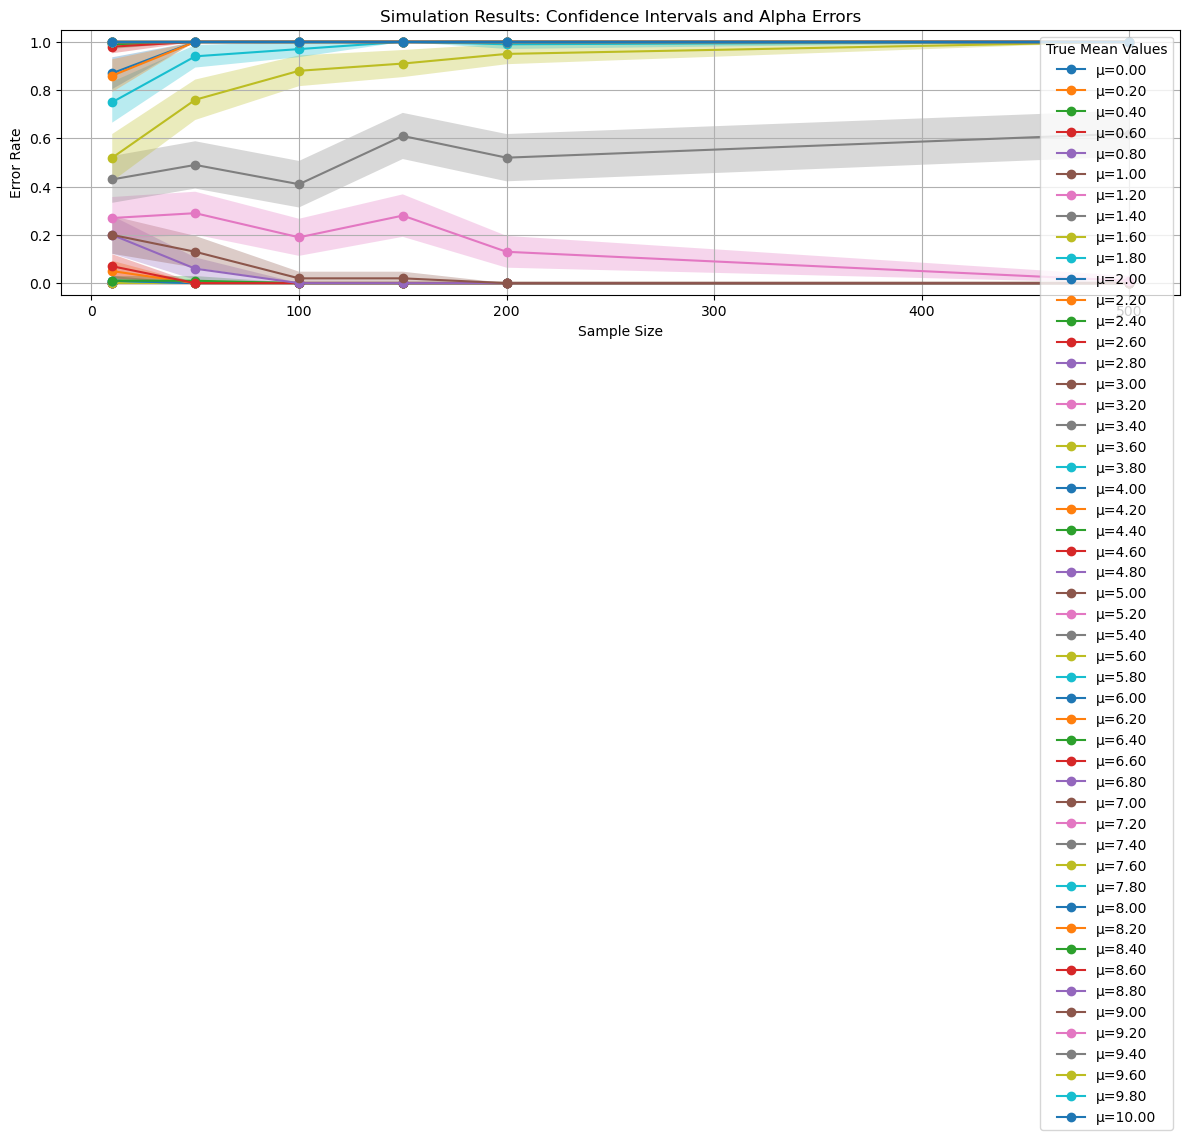

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

NUM_SIMULATIONS = 100
SAMPLE_SIZES = [10, 50, 100, 150, 200, 500]
ALPHA = 0.05
TRUE_MEANS = np.linspace(0, 10, 51)

def compute_confidence_interval(sample, alpha=0.05):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Используем стандартное отклонение выборки
    t_critical = stats.t.ppf(1 - alpha/2, df=len(sample) - 1)
    margin_of_error = sample_std * t_critical / np.sqrt(len(sample))

    return sample_mean - margin_of_error, sample_mean + margin_of_error

error_rates = {}
lower_bound_intervals = {}
upper_bound_intervals = {}

for true_mean in TRUE_MEANS:
    error_rate = []
    lower_intervals = []
    upper_intervals = []

    for n in SAMPLE_SIZES:
        count_success = 0
        for _ in range(NUM_SIMULATIONS):
            sample = np.random.normal(loc=true_mean, scale=1, size=n)
            estimated = np.mean((sample > -5) & (sample < 5))
            if estimated >= (1 - ALPHA):
                count_success += 1

        lower, upper = proportion_confint(NUM_SIMULATIONS - count_success, NUM_SIMULATIONS, alpha=ALPHA)
        lower_intervals.append(lower)
        upper_intervals.append(upper)
        error_rate.append(1 - count_success / NUM_SIMULATIONS)

    error_rates[true_mean] = error_rate
    lower_bound_intervals[true_mean] = lower_intervals
    upper_bound_intervals[true_mean] = upper_intervals

plt.figure(figsize=(12, 8))

for true_mean in TRUE_MEANS:
    plt.plot(SAMPLE_SIZES, error_rates[true_mean], marker='o', label=f"μ={true_mean:.2f}")
    plt.fill_between(SAMPLE_SIZES, lower_bound_intervals[true_mean], upper_bound_intervals[true_mean], alpha=0.3)

plt.title("Simulation Results: Confidence Intervals and Alpha Errors")
plt.xlabel("Sample Size")
plt.ylabel("Error Rate")
plt.grid(True)
plt.legend(loc="upper right", title="True Mean Values")
plt.tight_layout()
plt.show()
